## Desafío - Random Forest
### Camila Vera V

### Descripción
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price .
* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

### Ejercicio 1: Preparación del ambiente de trabajo
Importe las librerías clásicas a utilizar.
Para este ejercicio Random Forest de Regresión
De manera adicional importe las funciones y clases necesarias para generar un desempeño de
métricas en problemas de regresión.
Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from  joblib import load,dump

plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('ames_housing.csv', header=0).drop('Unnamed: 0', axis =1)

In [3]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Ejercicio 2: Importación de archivos serializados
* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
* No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:

Modelo Cami

In [4]:
modelo_tr_cami = load('tree_model_cami.joblib')

In [5]:
x_test_cam = pd.read_csv('x_test_cami.csv')
x_train_cam = pd.read_csv('x_train_cami.csv')
y_test_cam = pd.read_csv('y_test_cami.csv',squeeze = True)
y_train_cam = pd.read_csv('y_train_cami.csv',squeeze = True)

In [6]:
modelo_tr_cami.get_params()

{'criterion': 'mse',
 'max_depth': 8.0,
 'max_features': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

Modelo Cesar

In [7]:
modelo_tr_cesar = load('cesar_arbol_regresion.joblib')

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
x_test_ce = pd.read_csv('X_test_cesar.csv')
x_train_ce = pd.read_csv('X_train_cesar.csv')
y_test_ce = pd.read_csv('y_test_cesar.csv',names = ['Sale_Price'])
y_train_ce = pd.read_csv('y_train_cesar.csv',names = ['Sale_Price'])

In [9]:
modelo_tr_cesar.get_params()

{'criterion': 'mse',
 'max_depth': 8.0,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

## Ejercicio 3: Evaluación Random Forest
* En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando
sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla
pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su
compañero.

Random Forest Cami

In [10]:
rf_model_cam=RandomForestRegressor(random_state= 25).fit(x_train_cam,y_train_cam)

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
print("Test MSE:", mean_squared_error(y_test_cam,rf_model_cam.predict(x_test_cam)).round(5))
print("Test MAE:", median_absolute_error(y_test_cam,rf_model_cam.predict(x_test_cam)).round(5))
print("Test R2:", r2_score(y_test_cam,rf_model_cam.predict(x_test_cam)).round(5))

Test MSE: 1100694795.68468
Test MAE: 14095.0
Test R2: 0.83134


Random Forest Cesar

In [12]:
rf_model_cesar=RandomForestRegressor(random_state= 25).fit(x_train_ce,y_train_ce)

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/camila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [13]:
print("Test MSE:", mean_squared_error(y_test_ce,rf_model_cesar.predict(x_test_ce)).round(5))
print("Test MAE:", median_absolute_error(y_test_ce,rf_model_cesar.predict(x_test_ce)).round(5))
print("Test R2:", r2_score(y_test_ce,rf_model_cesar.predict(x_test_cam)).round(5))

Test MSE: 1100694795.68468
Test MAE: 14095.0
Test R2: 0.83134


Ambos modelos reportan las mismas metricas de desempeno.

## Ejercicio 4: Reporte las métricas de desempeño
* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes
hiperparámetros:
    * max_features : None , log2 , sqrt .
    * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

In [14]:
# listas para guardar los valores
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []
n_estimators = range(20, 1000, 50)

In [15]:

for i in n_estimators:
    model_rf_none = RandomForestRegressor(n_estimators= i,max_features=None,
                                           oob_score=True,
                                           random_state=25).fit(x_train_cam, y_train_cam)

    model_rf_sqrt = RandomForestRegressor(n_estimators= i,
                                           max_features='sqrt',
                                          oob_score=True,
                                           random_state=25).fit(x_train_cam, y_train_cam)

    model_rf_log = RandomForestRegressor(n_estimators= i,
                                          max_features='log2',
                                         oob_score=True,random_state=25).fit(x_train_cam, y_train_cam)

    # Estimamos el error en OOB
    tmp_oob_none.append(1 - model_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - model_rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - model_rf_log.oob_score_)
     

<Figure size 864x288 with 0 Axes>

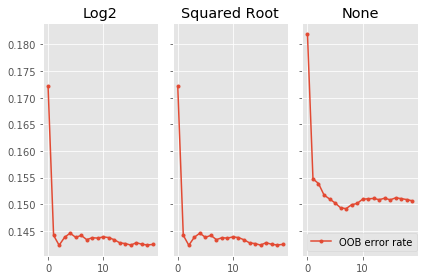

In [16]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
#log
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].set_title('Log2');
#sqrt
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].set_title('Squared Root');
#oob
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

In [20]:
np.min(tmp_oob_sqrt)

0.14230428010615004

In [22]:
np.min(tmp_oob_log2)

0.14230428010615004

In [23]:
np.argmin(tmp_oob_log2)

2

Los metodos de max_features: log2 y sqrt, obtuvieron el mismo minimo en el espacio de busqueda. Por lo tanto da igual cual hiperparametro escoger. Se usara Log2.
Segun el minimo de la lista, la cantidad de estimadores es 70 (20+50), por lo que los hiperparametros corresponden a 70 para n-estimators y log2 para max features.

## Ejercicio 5: Refactorice el modelo
En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su
desempeño.

In [26]:
best_model_reentrenado = RandomForestRegressor(n_estimators= 70,max_features='log2',
                                           random_state=25).fit(x_train_cam, y_train_cam)

In [27]:
print("Test MSE:", mean_squared_error(y_test_ce,best_model_reentrenado.predict(x_test_ce)).round(5))
print("Test MAE:", median_absolute_error(y_test_ce,best_model_reentrenado.predict(x_test_ce)).round(5))
print("Test R2:", r2_score(y_test_ce,best_model_reentrenado.predict(x_test_cam)).round(5))

Test MSE: 916203439.51217
Test MAE: 13462.85714
Test R2: 0.85961


En relacion a los modelos anteriores, este presenta un mejor desempeno, aumentando su R2 y disminuyendo el error absoluto medio.

                                                            ***